In [191]:
# refer URL  :
# https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
#-------------------- Load data ----------------------------
#-----------------------------------------------------------
#----- dataset has 1,460 rows and 81 columns  
#----- numeric : 38 
#----- string : 43
#-----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
 
# read the data
df = pd.read_csv('file_price_house/train.csv')

print(df.shape) # แสดง (Row, column)
print(df.dtypes) # แสดง data type

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("----------------------------------------")
print("### numeric columns -> ",len(numeric_cols))
print(numeric_cols) 

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

print("----------------------------------------")
print("### String Columns -> ",len(non_numeric_cols))
print(non_numeric_cols) 

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
----------------------------------------
### numeric columns ->  38
['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']
----------------------------------------
### String Columns ->  43
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilitie

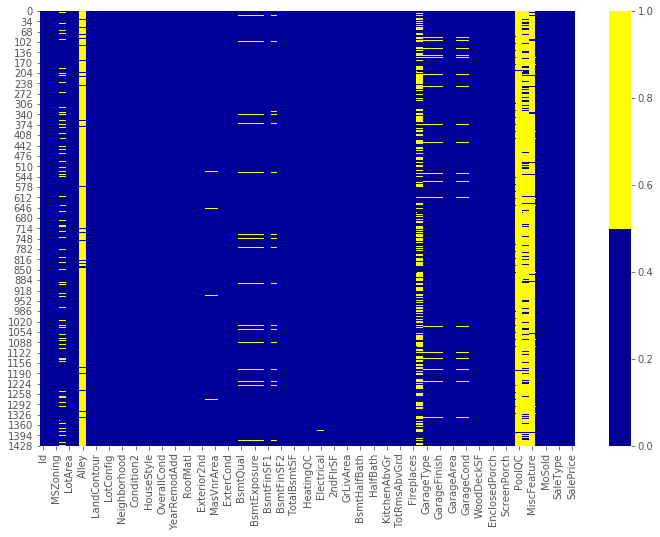

In [192]:
#1: find Missing Data Heatmap
##----------------------------------------------------------------------
## แถบสีเหลือง ข้อมูลจำนวนที่หายไป
## สีน้ำเงินแสดงข้อมูลทั่วไป
 
cols1 = df.columns[0:81] #  view column 0 to 81
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols1].isnull(), cmap=sns.color_palette(colours))
 

In [193]:
# แสดง missiong value เป็น % เพื่อเลือก column มา clean ข้อมูล
# ตัวที่มีค่า missing value > 50 % ค่าที่เป็น null 
# ลบไป 4 value 
#---------------------------
#Remove :  Alley ==> 94.0 %
#Remove :  PoolQC ==> 100.0 %
#Remove :  Fence ==> 81.0 %
#Remove :  MiscFeature ==> 96.0 %
#----------------------------------------
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    #print('{} - {}%'.format(col, round(pct_missing*100)))
    if round(pct_missing*100) > 50:  
        print('Remove column : ',col,'==>',round(pct_missing*100), ' %')
        cols_to_drop = ['{}'.format(col)] 
        df.drop(cols_to_drop,axis=1,inplace=True)
        
#df_missing.head()
print(df.shape)
df.head()
 

Remove column :  Alley ==> 94.0  %
Remove column :  PoolQC ==> 100.0  %
Remove column :  Fence ==> 81.0  %
Remove column :  MiscFeature ==> 96.0  %
(1460, 77)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [194]:
# ข้อมูลที่มี missing value
#3: Missing Data Histogram 
# first create missing indicator for features with missing data
  
print('Missing Column :')

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    pct_missing = np.mean(df[col].isnull())
    
    if num_missing > 0:  
        print('- {}'.format(col) , '=>' , num_missing,'(',round(pct_missing*100),'%) ')
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
 
df.shape
df.head()

Missing Column :
- LotFrontage => 259 ( 18.0 %) 
- MasVnrType => 8 ( 1.0 %) 
- MasVnrArea => 8 ( 1.0 %) 
- BsmtQual => 37 ( 3.0 %) 
- BsmtCond => 37 ( 3.0 %) 
- BsmtExposure => 38 ( 3.0 %) 
- BsmtFinType1 => 37 ( 3.0 %) 
- BsmtFinType2 => 38 ( 3.0 %) 
- Electrical => 1 ( 0.0 %) 
- FireplaceQu => 690 ( 47.0 %) 
- GarageType => 81 ( 6.0 %) 
- GarageYrBlt => 81 ( 6.0 %) 
- GarageFinish => 81 ( 6.0 %) 
- GarageQual => 81 ( 6.0 %) 
- GarageCond => 81 ( 6.0 %) 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType1_ismissing,BsmtFinType2_ismissing,Electrical_ismissing,FireplaceQu_ismissing,GarageType_ismissing,GarageYrBlt_ismissing,GarageFinish_ismissing,GarageQual_ismissing,GarageCond_ismissing,num_missing
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,False,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,False,False,False,False,False,False,False,False,False,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,False,False,False,False,False,False,False,False,False,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,False,False,False,False,False,False,False,False,False,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,False,False,False,False,False,False,False,False,False,0


In [195]:
# ลบ row ที่เป็น mission value โดยกำหนดเงื่อนไข 30 % ของ 81 columne = 24 
# ไม่มี row ที่เกิด 30 % ไม่ลบ
###########################################################
ind_missing = df[df['num_missing'] > 24].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
df_less_missing_rows.head()
print(df_less_missing_rows.shape)
print(df.shape)


(1460, 93)
(1460, 93)


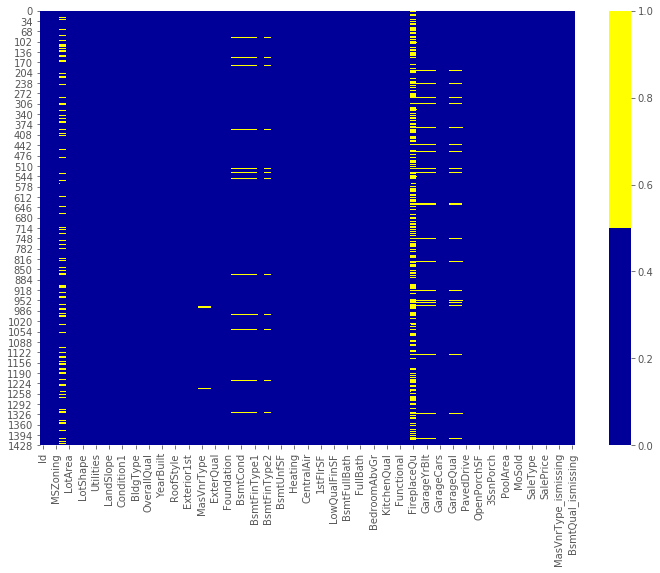

In [124]:
# เช็คข้อมูลยังมี missing value อยู่ 
#FireplaceQu => 690 ( 47.0 %) 
#
##------------------------------------------
cols1 = df.columns[0:81] #  view column 0 to 81
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols1].isnull(), cmap=sns.color_palette(colours))

In [196]:
 
## ลบข้อมูล column ที่นำมาเทียบเพื่อหา misssing value ออก
ismissing_cols = [col for col in df.columns if 'ismissing' in col] 
df.drop(df[ismissing_cols],axis=1,inplace=True)

##ลบข้อมูลที่ไม่จำเป็นออก
ismissing_cols = [col for col in df.columns if 'Id' in col] 
df.drop(df[ismissing_cols],axis=1,inplace=True)

ismissing_cols = [col for col in df.columns if 'num_missing' in col] 
df.drop(df[ismissing_cols],axis=1,inplace=True)
     

In [197]:
## replace value 
print(df.shape) 

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)  
    if num_missing > 0:  
        col_chk = '{}'.format(col) 
        print('- {}'.format(col) , '=>' , num_missing)  
        is_number = np.issubdtype(df[col_chk].dtype, np.number) 
        if  is_number :   # replace median
             med = df[col].median()
             df[col] = df[col].fillna(med)
        else : 
              top = df[col].describe()['top'] # impute with the most frequent value.
              df[col] = df[col].fillna(top)
                
                
print(df.shape) 
df.head()

(1460, 76)
- LotFrontage => 259
- MasVnrType => 8
- MasVnrArea => 8
- BsmtQual => 37
- BsmtCond => 37
- BsmtExposure => 38
- BsmtFinType1 => 37
- BsmtFinType2 => 38
- Electrical => 1
- FireplaceQu => 690
- GarageType => 81
- GarageYrBlt => 81
- GarageFinish => 81
- GarageQual => 81
- GarageCond => 81
(1460, 76)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


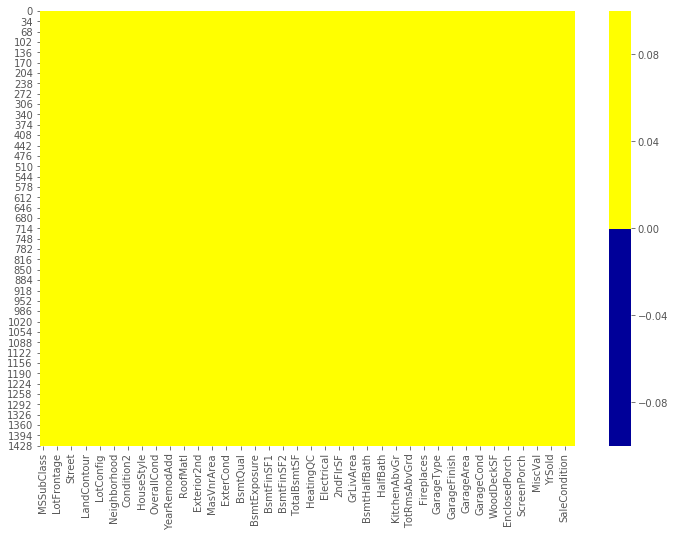

In [177]:
 


# เช็คข้อมูลยังมี missing value อยู่ 
#FireplaceQu => 690 ( 47.0 %) 
#
##------------------------------------------
cols1 = df.columns[0:81] #  view column 0 to 81
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols1].isnull(), cmap=sns.color_palette(colours))

In [199]:
##Create Sample Submission file and Submit using ANN
#pred=pd.DataFrame(ann_pred)
#sub_df=pd.read_csv('csv_datafile/train_HousePrice.csv')
#datasets=pd.concat([sub_df['Id'],pred],axis=1)
#datasets.columns=['Id','SalePrice']
#datasets.to_csv('csv_datafile/train_HousePrice.csv',index=False)

 

import pandas as pd 
pd.DataFrame(df).to_csv("file_price_house/train_clean.csv")